In [2]:
import cv2,os
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model
import tensorflow as tf
from keras.models import save_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [23]:
data_path='/content/drive/MyDrive/datset/plantdisease/train'
categories=os.listdir(data_path)                        
labels=[i for i in range(len(categories))]

In [5]:
print(categories)
print(labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Peach___Bacterial_spot', 'Peach___healthy']
[0, 1, 2, 3, 4, 5]


In [6]:
label_dict=dict(zip(categories,labels))

In [7]:
print(label_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Peach___Bacterial_spot': 4, 'Peach___healthy': 5}


In [8]:
img_size=100
data=[]
target=[]

In [9]:
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [10]:
len(data)

11345

In [11]:
len(target)

11345

In [12]:
type(data)

list

In [13]:
data=np.array(data)/255.0
type(data)

numpy.ndarray

In [14]:
data.shape

(11345, 100, 100, 3)

In [15]:
target = np.array(target)

In [16]:
target.shape

(11345,)

In [17]:
new_target=np_utils.to_categorical(target) 

In [18]:
print(new_target)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [19]:
new_target.shape

(11345, 6)

In [20]:
np.save('/content/drive/MyDrive/datset/plantdisease/data',data)
np.save('/content/drive/MyDrive/datset/plantdisease/target',new_target)

# Training starts from here

In [4]:
data=np.load('/content/drive/MyDrive/datset/plantdisease/data.npy')
target=np.load('/content/drive/MyDrive/datset/plantdisease/target.npy')

In [5]:
data.shape

(11345, 100, 100, 3)

In [31]:
target.shape

(11345, 6)

In [7]:
img_size = 100

In [8]:
data = np.reshape(data,(data.shape[0],img_size,img_size,3))

In [17]:
data.shape

(11345, 100, 100, 3)

In [18]:
data.shape[1:]

(100, 100, 3)

In [9]:
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [21]:
train_data.shape

(10210, 100, 100, 3)

In [22]:
test_data.shape

(1135, 100, 100, 3)

In [23]:
train_target.shape

(10210, 6)

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=100,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/100
256/256 [==============================] - ETA: 0s - loss: 1.0029 - accuracy: 0.6082

256/256 [==============================] - 24s 42ms/step - loss: 1.0029 - accuracy: 0.6082 - val_loss: 0.5095 - val_accuracy: 0.8168
Epoch 2/100
254/256 [============================>.] - ETA: 0s - loss: 0.4942 - accuracy: 0.8305

256/256 [==============================] - 8s 33ms/step - loss: 0.4926 - accuracy: 0.8310 - val_loss: 0.4565 - val_accuracy: 0.8369
Epoch 3/100
256/256 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8564

256/256 [==============================] - 8s 33ms/step - loss: 0.4020 - accuracy: 0.8564 - val_loss: 0.3661 - val_accuracy: 0.8727
Epoch 4/100
256/256 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.8869

256/256 [==============================] - 9s 34ms/step - loss: 0.3244 - accuracy: 0.8869 - val_loss: 0.3331 - val_accuracy: 0.8879
Epoch 5/100
256/256 [==============================] - ETA: 0s - loss: 0.2794 - accuracy: 0.9021

256/256 [==============================] - 8s 32ms/step - loss: 0.2794 - accuracy: 0.9021 - val_loss: 0.3143 - val_accuracy: 0.8893
Epoch 6/100
256/256 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9204

256/256 [==============================] - 8s 32ms/step - loss: 0.2324 - accuracy: 0.9204 - val_loss: 0.2092 - val_accuracy: 0.9236
Epoch 7/100
256/256 [==============================] - 6s 25ms/step - loss: 0.1838 - accuracy: 0.9360 - val_loss: 0.2180 - val_accuracy: 0.9251
Epoch 8/100
254/256 [============================>.] - ETA: 0s - loss: 0.1639 - accuracy: 0.9435

256/256 [==============================] - 8s 32ms/step - loss: 0.1634 - accuracy: 0.9438 - val_loss: 0.1393 - val_accuracy: 0.9554
Epoch 9/100
256/256 [==============================] - ETA: 0s - loss: 0.1636 - accuracy: 0.9432

256/256 [==============================] - 8s 33ms/step - loss: 0.1636 - accuracy: 0.9432 - val_loss: 0.1317 - val_accuracy: 0.9608
Epoch 10/100
256/256 [==============================] - 7s 26ms/step - loss: 0.1447 - accuracy: 0.9498 - val_loss: 0.1601 - val_accuracy: 0.9505
Epoch 11/100
256/256 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9548

256/256 [==============================] - 9s 34ms/step - loss: 0.1252 - accuracy: 0.9548 - val_loss: 0.1044 - val_accuracy: 0.9696
Epoch 12/100
256/256 [==============================] - 7s 26ms/step - loss: 0.1048 - accuracy: 0.9625 - val_loss: 0.1471 - val_accuracy: 0.9486
Epoch 13/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0967 - accuracy: 0.9671 - val_loss: 0.1345 - val_accuracy: 0.9579
Epoch 14/100
256/256 [==============================] - 7s 25ms/step - loss: 0.0887 - accuracy: 0.9716 - val_loss: 0.1061 - val_accuracy: 0.9662
Epoch 15/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0861 - accuracy: 0.9690 - val_loss: 0.1239 - val_accuracy: 0.9564
Epoch 16/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0813 - accuracy: 0.9711 - val_loss: 0.1432 - val_accuracy: 0.9545
Epoch 17/100
256/256 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9701

256/256 [==============================] - 9s 33ms/step - loss: 0.0846 - accuracy: 0.9701 - val_loss: 0.1031 - val_accuracy: 0.9691
Epoch 18/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0750 - accuracy: 0.9731 - val_loss: 0.1706 - val_accuracy: 0.9486
Epoch 19/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0632 - accuracy: 0.9783 - val_loss: 0.1512 - val_accuracy: 0.9496
Epoch 20/100
254/256 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9723

256/256 [==============================] - 8s 32ms/step - loss: 0.0804 - accuracy: 0.9723 - val_loss: 0.0963 - val_accuracy: 0.9711
Epoch 21/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0702 - accuracy: 0.9750 - val_loss: 0.1139 - val_accuracy: 0.9633
Epoch 22/100
255/256 [============================>.] - ETA: 0s - loss: 0.0685 - accuracy: 0.9763

256/256 [==============================] - 8s 32ms/step - loss: 0.0685 - accuracy: 0.9764 - val_loss: 0.0839 - val_accuracy: 0.9736
Epoch 23/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0631 - accuracy: 0.9788 - val_loss: 0.0969 - val_accuracy: 0.9682
Epoch 24/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0565 - accuracy: 0.9809 - val_loss: 0.0967 - val_accuracy: 0.9672
Epoch 25/100
255/256 [============================>.] - ETA: 0s - loss: 0.0437 - accuracy: 0.9842

256/256 [==============================] - 8s 33ms/step - loss: 0.0437 - accuracy: 0.9842 - val_loss: 0.0776 - val_accuracy: 0.9770
Epoch 26/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0502 - accuracy: 0.9829 - val_loss: 0.1061 - val_accuracy: 0.9691
Epoch 27/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0615 - accuracy: 0.9782 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 28/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0414 - accuracy: 0.9854 - val_loss: 0.0847 - val_accuracy: 0.9750
Epoch 29/100
256/256 [==============================] - 7s 25ms/step - loss: 0.0415 - accuracy: 0.9846 - val_loss: 0.0784 - val_accuracy: 0.9736
Epoch 30/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0281 - accuracy: 0.9893 - val_loss: 0.1288 - val_accuracy: 0.9652
Epoch 31/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0545 - accuracy: 0.9819 - val_loss: 0.0943 - val_accuracy: 0.974

256/256 [==============================] - 8s 32ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0734 - val_accuracy: 0.9809
Epoch 48/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.1323 - val_accuracy: 0.9613
Epoch 49/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 50/100
256/256 [==============================] - 7s 26ms/step - loss: 0.0175 - accuracy: 0.9936 - val_loss: 0.0744 - val_accuracy: 0.9804
Epoch 51/100
256/256 [==============================] - 7s 25ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0931 - val_accuracy: 0.9726
Epoch 52/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0511 - accuracy: 0.9831 - val_loss: 0.0828 - val_accuracy: 0.9780
Epoch 53/100
256/256 [==============================] - 7s 25ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.1070 - val_accuracy: 0.974

256/256 [==============================] - 8s 30ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0647 - val_accuracy: 0.9824
Epoch 74/100
256/256 [==============================] - 7s 25ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0702 - val_accuracy: 0.9848
Epoch 75/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0927 - val_accuracy: 0.9785
Epoch 76/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.1121 - val_accuracy: 0.9736
Epoch 77/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0939 - val_accuracy: 0.9755
Epoch 78/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0797 - val_accuracy: 0.9814
Epoch 79/100
256/256 [==============================] - 6s 25ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.1291 - val_accuracy: 0.960

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 activation (Activation)     (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [14]:
print("[INFO] saving covid detection model...")
model.save('/content/drive/MyDrive/datset/plantdisease/plant_disease.model', save_format="h5")

[INFO] saving covid detection model...


In [15]:
print(model.evaluate(test_data,test_target))

36/36 [==============================] - 1s 20ms/step - loss: 0.1154 - accuracy: 0.9665
[0.11535706371068954, 0.966519832611084]


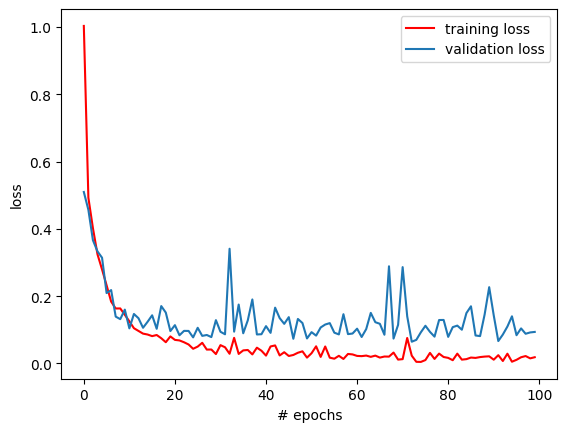

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/datset/plantdisease/training loss.jpg',pad_inches = 1)

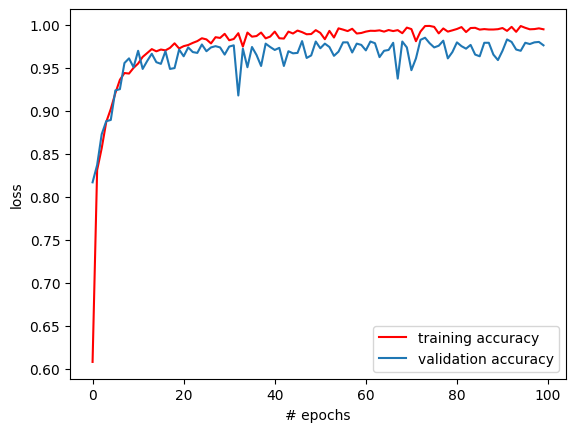

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/datset/plantdisease/training accuracy.jpg',pad_inches = 1)


# Training of Model finished
# Now from here on testing of model is done

In [18]:
np.save('/content/drive/MyDrive/datset/plantdisease/test_data',test_data)
np.save('/content/drive/MyDrive/datset/plantdisease/test_target',test_target)

In [ ]:
model = load_model('/content/drive/MyDrive/final year project/Important/xray.model')

# Testing the model by giving the single image

In [42]:
img_path = '/content/drive/MyDrive/datset/plantdisease/valid/Apple___Black_rot/02859ed3-f56a-4315-82a5-c1cb72717225___JR_FrgE.S 8584_new30degFlipLR.JPG'
testing=cv2.imread(img_path)
resized=cv2.resize(testing,(100,100))

normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,3))
result=model.predict(reshaped)
#print(result)
place_array = np.where(result[0] == max(result[0]))
#print(place_array)
posi = place_array[0][0]
categories[posi]

1/1 [==============================] - 0s 86ms/step


'Apple___Black_rot'

In [20]:
y_pred = model.predict(test_data)

36/36 [==============================] - 0s 12ms/step


In [21]:
y_pred

array([[9.9999964e-01, 1.0619066e-11, 1.3854319e-10, 3.6954984e-07,
        2.8977791e-09, 7.8745528e-15],
       [5.0210097e-04, 7.7277925e-08, 1.7924185e-11, 9.9949741e-01,
        9.8171808e-09, 3.4394569e-07],
       [2.5886724e-15, 7.3283429e-10, 2.6849894e-11, 3.1161763e-14,
        1.0000000e+00, 2.4369229e-14],
       ...,
       [3.7877226e-09, 9.9997103e-01, 8.6651585e-07, 4.8676413e-10,
        2.8067874e-05, 1.0203938e-08],
       [8.2274199e-02, 4.4221844e-05, 8.7710446e-01, 3.4495542e-04,
        4.0231958e-02, 9.8161017e-08],
       [2.0907081e-23, 2.8339443e-27, 1.8610717e-27, 2.2219803e-19,
        2.8131879e-20, 1.0000000e+00]], dtype=float32)

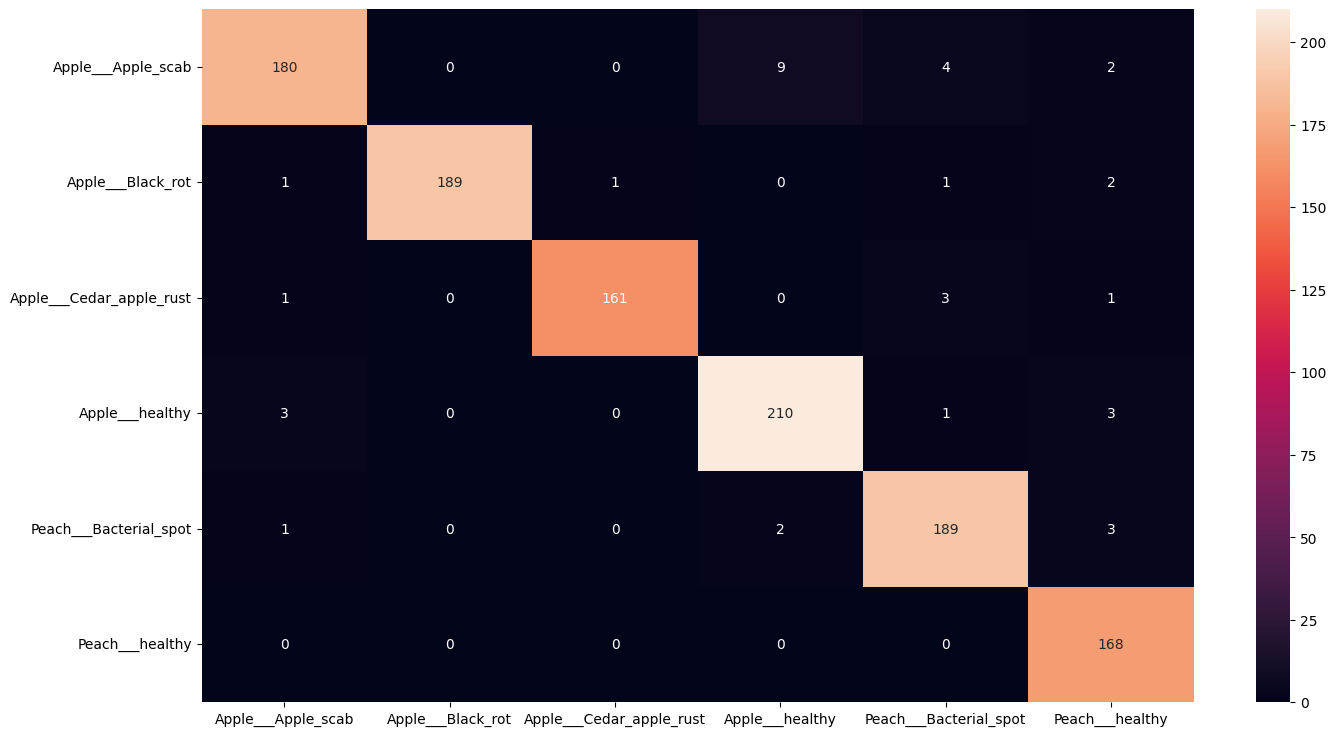

<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
test_target_labels = [np.argmax(label) for label in test_target]
cm = confusion_matrix(test_target_labels,y_pred_labels)

sns.heatmap(cm,annot= True, fmt = 'd',xticklabels =categories,yticklabels= categories)
plt.show()
plt.savefig('/content/drive/MyDrive/datset/plantdisease/Confusion_Matrix.jpg',pad_inches = 1)

In [25]:
from sklearn.metrics import classification_report
class_rep = classification_report(test_target_labels,y_pred_labels)
print(class_rep)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       195
           1       1.00      0.97      0.99       194
           2       0.99      0.97      0.98       166
           3       0.95      0.97      0.96       217
           4       0.95      0.97      0.96       195
           5       0.94      1.00      0.97       168

    accuracy                           0.97      1135
   macro avg       0.97      0.97      0.97      1135
weighted avg       0.97      0.97      0.97      1135

